In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = load_breast_cancer()

In [ ]:
X = data.data
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression(max_iter=10000)

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956140350877193


In [ ]:
#Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Confusion Matrix: 
[[39  4]
 [ 1 70]]


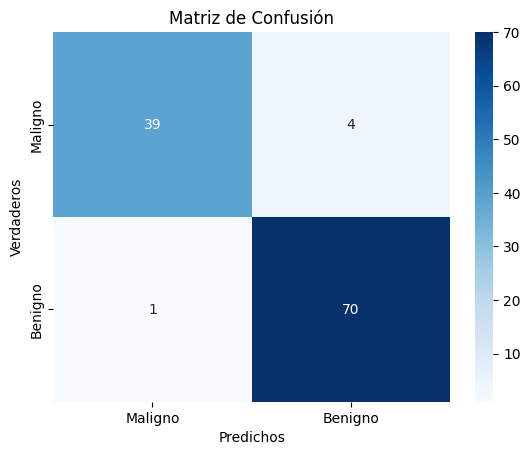

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crea una figura y un conjunto de subtramas (en este caso, solo uno)
fig, ax = plt.subplots()

# Crea un mapa de calor para la matriz de confusión
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues")

# Etiquetas, título y ticks
ax.set_xlabel('Predichos')
ax.set_ylabel('Verdaderos')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['Maligno','Benigno'])
ax.yaxis.set_ticklabels(['Maligno','Benigno'])

plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calcula las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Crea un DataFrame de pandas para mostrar las métricas
metrics_summary = pd.DataFrame({
    'Métrica': ['Exactitud', 'Precisión', 'Sensibilidad', 'Puntuación F1', 'Área bajo la curva ROC'],
    'Valor': [accuracy, precision, recall, f1, roc_auc]
})

print(metrics_summary)

                  Métrica     Valor
0               Exactitud  0.956140
1               Precisión  0.945946
2            Sensibilidad  0.985915
3           Puntuación F1  0.965517
4  Área bajo la curva ROC  0.946446


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Obtener las probabilidades de la clase positiva
y_prob = logistic_model.predict_proba(X_test)[:, 1]
y_prob

array([8.79575919e-01, 3.01697281e-08, 1.58637676e-03, 9.98777194e-01,
       9.99859343e-01, 1.94855406e-10, 5.87867598e-11, 1.91065754e-02,
       9.84492270e-01, 9.94325522e-01, 9.29602892e-01, 8.02156009e-04,
       9.89052161e-01, 1.73654157e-01, 9.99205076e-01, 1.77787869e-03,
       9.98809893e-01, 9.99988327e-01, 9.99999401e-01, 6.93175245e-07,
       8.29237723e-01, 9.92383999e-01, 5.85796808e-09, 9.99667570e-01,
       9.96603745e-01, 9.99758352e-01, 9.98968429e-01, 9.98997845e-01,
       9.95323785e-01, 7.12894256e-09, 9.98554330e-01, 9.99762209e-01,
       9.99134976e-01, 9.86594045e-01, 9.99885013e-01, 9.99066552e-01,
       2.07739738e-03, 9.99010607e-01, 1.00304587e-05, 7.19610644e-01,
       9.99786784e-01, 6.24911105e-04, 9.99538229e-01, 9.96019254e-01,
       9.99763344e-01, 9.82913421e-01, 9.99968449e-01, 9.99551331e-01,
       9.59072694e-01, 9.98586319e-01, 9.50438067e-05, 2.74593250e-09,
       8.60130878e-01, 9.99622845e-01, 9.99403791e-01, 9.86177862e-01,
      

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [ ]:
# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

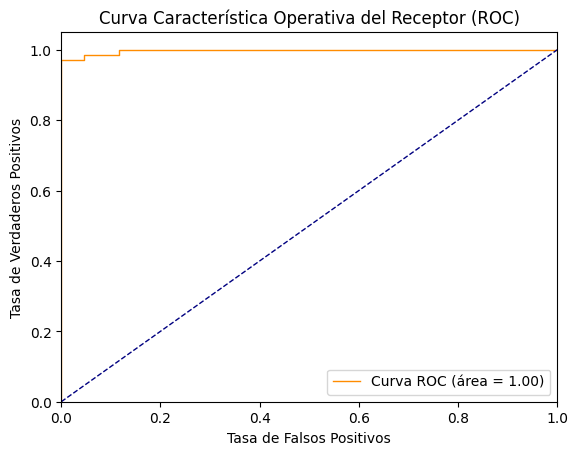

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar el conjunto de datos
data = load_breast_cancer()
X2 = data.data[:, :1]  # Usamos solo una característica para simplificar la visualización
y2 = data.target

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X2_train, y2_train)

LogisticRegression(max_iter=10000)

In [ ]:
X2_test_prob = logistic_model.predict_proba(X2_test)[:, 1]

In [ ]:
# Ordenar los datos para la gráfica
sort_order = np.argsort(X2_test[:, 0])
X_test_sorted = X2_test[sort_order]
X_test_prob_sorted = X2_test_prob[sort_order]

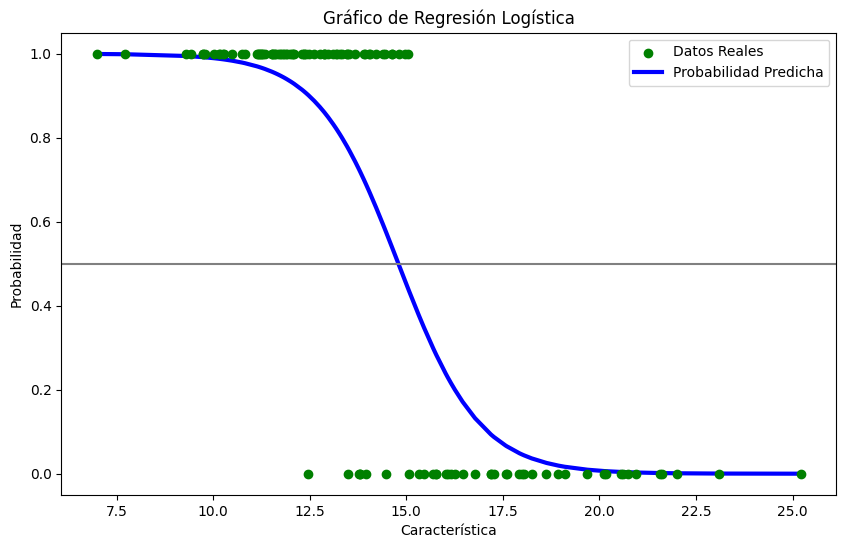

In [ ]:
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X2_test, y2_test, color='green', zorder=20, label='Datos Reales')
plt.plot(X_test_sorted, X_test_prob_sorted, color='blue', linewidth=3, label='Probabilidad Predicha')
plt.axhline(.5, color='.5')
plt.title('Gráfico de Regresión Logística')
plt.xlabel('Característica')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

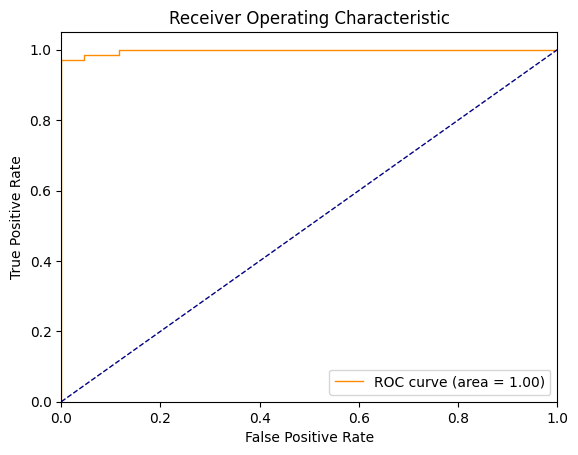

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

# Obtener las probabilidades de la clase positiva
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()